In [1]:

%load_ext autoreload
%autoreload 2

import sys 
sys.path.insert(0,'/app')
sys.path.insert(0,'..')
import diart
from audio.redis import *

/usr/local/lib/python3.9/site-packages/pyannote/audio/core/io.py:43: UserWarning: torchaudio._backend.set_audio_backend has been deprecated. With dispatcher enabled, this function is no-op. You can remove the function call.
  torchaudio.set_audio_backend("soundfile")
/usr/local/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import redis

In [3]:
def get_inner_redis():
    
    db = redis.from_url(
            "redis://redis:6379",decode_responses=True
        )

    db.ping()

    return db

In [4]:
from pathlib import Path

def list_directory_contents(path='.'):
    """
    Lists the contents of a directory using pathlib.

    :param path: The directory path to list contents of. Defaults to the current directory.
    :return: None
    """
    p = Path(path)
    return [entry for entry in p.iterdir()]


In [5]:
files = list_directory_contents('/audio/')

In [6]:
audio_file_path = files[0];audio_file_path

PosixPath('/audio/42381612-e5e2-46ba-bb5a-73d17d25f90f--0.webm')

In [7]:
redis_client = get_inner_redis()

In [8]:
redis_client.keys('*')

['c9682039-3bf7-4d41-8fc6-69eff98b097b',
 '20779b86-a544-4483-b70b-6567acf5b846',
 'Start:42381612-e5e2-46ba-bb5a-73d17d25f90f--0',
 'test',
 '63b2fe71-b22e-40a9-bccd-f6509d0d8691',
 '7b2f5cfb-9171-4eab-9b35-bd65bc1a925c',
 'diarization_85ecfa13-14ce-4c59-a824-b3405d258f13--0',
 '21801789-400a-4eb1-ae76-1bb73b9771a1',
 'd1a63b4d-c2fc-40e6-bca9-bb875fbf97c3',
 'diarization_42381612-e5e2-46ba-bb5a-73d17d25f90f--0',
 'Segment:a72d3780-84f9-4e0a-8a60-6b3aba70bf23--0',
 '58ec14e6-457c-4614-9a89-54482c0d24ca',
 '8da4cbc3-2fe4-4032-84e3-e8775ad913dd',
 'f15d36ab-7cbc-4529-bdf2-70e37775fe68',
 '796ceef6-df11-447d-9e1f-ee1eadcc478c',
 'Start:a72d3780-84f9-4e0a-8a60-6b3aba70bf23--0',
 '045d11f5-3d54-4dde-a572-f8043f146abb',
 'Segment:42381612-e5e2-46ba-bb5a-73d17d25f90f--0',
 '9bdf4c01-0709-4b98-b3bb-37196a84c033',
 'b72c112c-ec66-4e0c-8196-b78a32daa756',
 '9aac8334-114b-4721-8617-1858a030e986',
 '031a0b05-3029-470a-9608-3dbf6a202502',
 'Start:a5fc8dae-9463-4973-ae9c-f95ed56b2137--0',
 '471d87bf

In [9]:
from diart import SpeakerDiarization,SpeakerDiarizationConfig
from diart.sources import FileAudioSource
from diart.inference import StreamingInference
from diart.sinks import RedisWriter
from diart import PipelineConfig

In [10]:
from diart import PipelineConfig, SpeakerDiarization

In [11]:
config = SpeakerDiarizationConfig(delta_new=1.0)

In [12]:

pipeline = SpeakerDiarization(config,return_embeddings=True) # return_embeddings

Lightning automatically upgraded your loaded checkpoint from v1.5.4 to v2.2.1. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint ../../../../root/.cache/torch/pyannote/models--pyannote--segmentation/snapshots/2ffce0501d0aecad81b43a06d538186e292d0070/pytorch_model.bin`


Model was trained with pyannote.audio 0.0.1, yours is 3.1.1. Bad things might happen unless you revert pyannote.audio to 0.x.
Model was trained with torch 1.10.0+cu102, yours is 2.2.1+cu121. Bad things might happen unless you revert torch to 1.x.


Lightning automatically upgraded your loaded checkpoint from v1.2.7 to v2.2.1. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint ../../../../root/.cache/torch/pyannote/models--pyannote--embedding/snapshots/c6335d8f1cd77b30084387468a6cf26fea90009b/pytorch_model.bin`
Lightning automatically upgraded your loaded checkpoint from v1.2.7 to v2.2.1. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint ../../../../root/.cache/torch/pyannote/models--pyannote--embedding/snapshots/c6335d8f1cd77b30084387468a6cf26fea90009b/pytorch_model.bin`


Model was trained with pyannote.audio 0.0.1, yours is 3.1.1. Bad things might happen unless you revert pyannote.audio to 0.x.
Model was trained with torch 1.8.1+cu102, yours is 2.2.1+cu121. Bad things might happen unless you revert torch to 1.x.
Model was trained with pyannote.audio 0.0.1, yours is 3.1.1. Bad things might happen unless you revert pyannote.audio to 0.x.
Model was trained with torch 1.8.1+cu102, yours is 2.2.1+cu121. Bad things might happen unless you revert torch to 1.x.


In [13]:
sample_rate = 16000
file_source = FileAudioSource(audio_file_path,sample_rate)  # Use FileAudioSource

inference = StreamingInference(pipeline, file_source, do_plot=False)


In [14]:

inference.attach_observers(RedisWriter(file_source.uri, redis_client)) # RedisWriter instead of RTTMWriter

In [15]:
#inference.attach_observers(RTTMWriter(file_source.uri,'text.csv')) # RedisWriter instead of RTTMWriter

In [16]:
prediction = inference()

Took 0.089 (+/-0.015) seconds/chunk -- ran 586 times

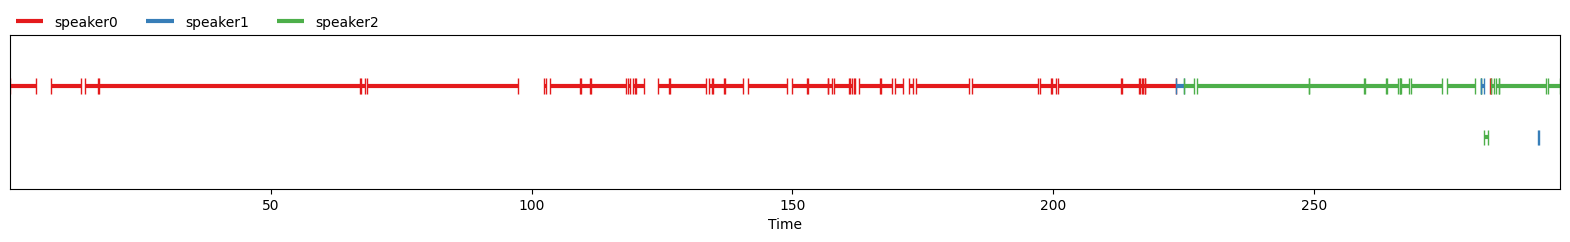

In [17]:
prediction